In [21]:
import numpy as np
import matplotlib.pyplot as plt
from Classic_DeepRL import DeepRLClassic
from cop_car_ctrm import CopCarCTRM
from cop_car import CopCarEnv
from fire_fighter_ctrm import FireFighterCTRM
from Firfighter import  FireFighterEnv
from counterfactualDeepRL import DeepRLCounterFactual

In [22]:
#Firefighter environment- max rows and columns is 7
rows = 5
columns = 5
probability = 0.9
environment = FireFighterEnv(rows= rows, cols= columns, probability= probability)
#Firefighter CTRM 
ctrm = FireFighterCTRM()
Gamma = 0.001
num_episodes = 10000
episode_length = 50
UPDATE_FREQUENCY = 100

In [23]:
# Perform value iteration to get the actual value of the objective
from value_iteration import ValueIteration
vi = ValueIteration(gamma = Gamma, environment = environment, ctrm = ctrm )
Value = vi.doVI()

In [24]:
all_runs_data_classic = [] 
for i in range(10):
    RL_classic = DeepRLClassic(Gamma=Gamma, number_of_episodes=num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY, env= environment, ctrm= ctrm )
    classic_data = RL_classic.doRL()
    all_runs_data_classic.append(classic_data)
average_results_classic = [0] * len(all_runs_data_classic[0])
for i in range(len(all_runs_data_classic[0])):
    sum_val = 0
    for j in range(len(all_runs_data_classic)):
        sum_val += all_runs_data_classic[j][i]
    average_results_classic[i] = sum_val / len(all_runs_data_classic)
    average_results_classic[i] /= Value
print(average_results_classic)

[0.0, 0.06440423280906969, 0.13009470200910617, 0.1606167090723213, 0.24602863110351098, 0.29012757338202694, 0.3264684925764545, 0.34781093036875005, 0.3667622862233187, 0.3740905063357668, 0.417948540097516, 0.4495729638920504, 0.48192912020317125, 0.5084146495739255, 0.5283949311412108, 0.5462740424750815, 0.5617697899122626, 0.5791708127823048, 0.5940352058091252, 0.6092412097948846, 0.6178762265333636, 0.627070361978662, 0.6385308952660075, 0.6490109451107325, 0.6588300811716319, 0.6643555584223952, 0.6725654953714519, 0.6803838943506958, 0.687526652263018, 0.6943900145555856, 0.7007965876966448, 0.7064781367249577, 0.7110388595218192, 0.7161329911863683, 0.7206255748398331, 0.7253727237813354, 0.7298910272343676, 0.7341605652750981, 0.7380859936513148, 0.741661373026247, 0.745061637472508, 0.7483354104285606, 0.7515559481589645, 0.7547824258608049, 0.7573257193224626, 0.7604539312774367, 0.7632982936385175, 0.7658443962513599, 0.7683708622130684, 0.7706048604404937, 0.77311386915

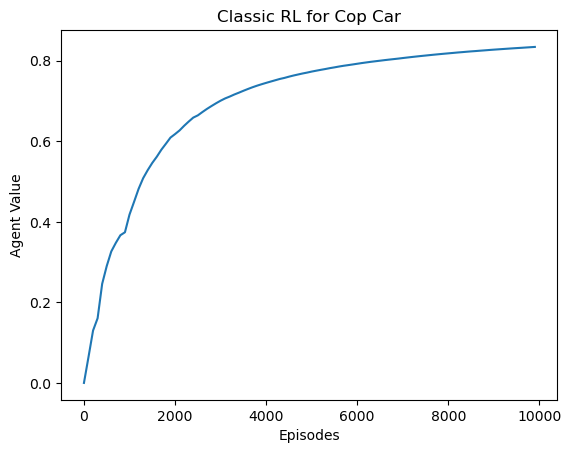

In [25]:
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Classic RL for Cop Car')
plt.show()

In [26]:
all_runs_data_counter = [] 
for i in range(10):
    RL_counterfactual = DeepRLCounterFactual(Gamma=Gamma, number_of_episodes= num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY,  env= environment, ctrm= ctrm )
    counterfactual_data = RL_counterfactual.doRL()
    all_runs_data_counter.append(counterfactual_data)
average_results_counter = [0] * len(all_runs_data_counter[0])
for i in range(len(all_runs_data_counter[0])):
    sum_val = 0
    for j in range(len(all_runs_data_counter)):
        sum_val += all_runs_data_counter[j][i]
    average_results_counter[i] = sum_val / len(all_runs_data_counter)
    average_results_counter[i] /= Value
print(average_results_counter)

[0.0, 0.0, 0.0, 0.07704524045252874, 0.16268615004276632, 0.24066387698904723, 0.2830394078542822, 0.34576761636046816, 0.4006493862736783, 0.45081529625225975, 0.4814955401568621, 0.5159198157731343, 0.5298675844623371, 0.5568184810080652, 0.5799379123178202, 0.6005463064711445, 0.6185835905671082, 0.6340074181019107, 0.6473933405194606, 0.6558584932084343, 0.6678261904891056, 0.6785918989326718, 0.688355377266471, 0.6972206405230187, 0.6994598068637929, 0.7048759550356619, 0.7089781259123321, 0.7118527611534824, 0.7153948294968997, 0.7206765515399783, 0.7265301078779414, 0.7320178169447819, 0.737149093943603, 0.7417827488431374, 0.7425266018463567, 0.7444406959432084, 0.7485377483322558, 0.7525114607340296, 0.7559998063260451, 0.7594529874186899, 0.7621260704788809, 0.764689591049143, 0.767675070895411, 0.7705007147124582, 0.7724221560227157, 0.7750217482579932, 0.777426006515333, 0.7797310607411159, 0.7820212117675632, 0.7841604285549663, 0.7863146434700338, 0.7882694954906967, 0.78

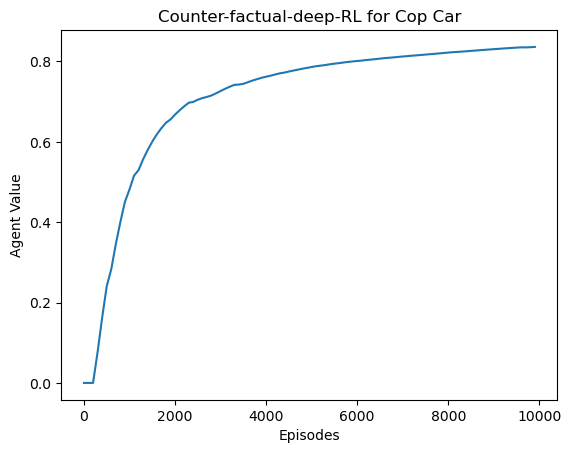

In [27]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Counter-factual-deep-RL for Cop Car')
plt.show()

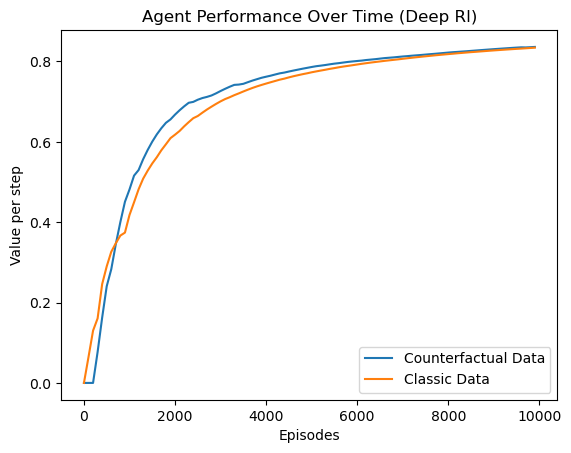

In [28]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter, label='Counterfactual Data')

# Plot classic data
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic, label='Classic Data')

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Value per step')
plt.title('Agent Performance Over Time (Deep Rl)')

# Adding a legend to clarify which line corresponds to which dataset
plt.legend()

# Show the plot
plt.show()

In [29]:
print(counterfactual_data)

[0.0, 0.0, 0.0, 0.0, 0.0523360291432706, 0.04361335761939217, 0.037382877959479, 0.06542003642908825, 0.08756791671433087, 0.10224487599192356, 0.11425329721904486, 0.12653886792715385, 0.1369343508340153, 0.1458447647541823, 0.15356712348499366, 0.16032418737445361, 0.16628630257103594, 0.1717565612613268, 0.17648938149580184, 0.1807489197068294, 0.1847490168158505, 0.18824588631132785, 0.1915721938193689, 0.19449335848174323, 0.19718082997112762, 0.19977968108747934, 0.20207229088854872, 0.20420114284668459, 0.20628906754149795, 0.2081354368139931, 0.2099617439811634, 0.21157794403538807, 0.21309619257117488, 0.21452513236956247, 0.21587241846518507, 0.21714485533327305, 0.21834851183011308, 0.21956962886080147, 0.2206493857032515, 0.22167515470357904, 0.22265088619169549, 0.2235801542756159, 0.22446620058819117, 0.22531197206837666, 0.22612015370499836, 0.226893197009593, 0.2276333448544177, 0.228342653205708, 0.22902301019572116, 0.2296761529061338, 0.23030368217692243, 0.230907075

In [30]:
from TabularLearning import DynamicQLearning
from TabularLearningCounterFactual import DynamicQLearningCounterFactual
Gamma = 0.001
num_episodes = 8000
episode_length = 50
alpha = 0.01
UPDATE_FREQUENCY = 75


In [31]:
all_runs_data_classic = [] 
for i in range(10):
    tabularlearning = DynamicQLearning(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm)
    tabular_data = tabularlearning.train( num_episodes = num_episodes, max_episode_length = episode_length )    
    all_runs_data_classic.append(tabular_data)
average_results_classic = [0] * len(all_runs_data_classic[0])
for i in range(len(all_runs_data_classic[0])):
    sum_val = 0
    for j in range(len(all_runs_data_classic)):
        sum_val += all_runs_data_classic[j][i]
    average_results_classic[i] = sum_val / len(all_runs_data_classic)
    average_results_classic[i] /= Value
print(average_results_classic)




[0.0, 0.07682353655920524, 0.2100987599628028, 0.2801723515999428, 0.33631576714072775, 0.37374471083458444, 0.40047967061591055, 0.4205308904519052, 0.43612628365767886, 0.44860259822229775, 0.4588104919569858, 0.467317070069226, 0.47451494385650617, 0.48068454995988913, 0.4860315419161542, 0.49071015987788635, 0.49483835219706174, 0.4985078564807732, 0.5017910971556729, 0.5047460137630826, 0.5074195097412153, 0.5098499606304268, 0.5120690679640545, 0.5141032496865467, 0.5159746968712395, 0.5177021865801867, 0.5193017140884714, 0.5207869896318783, 0.5221698323791882, 0.5234604856100109, 0.5246678708904579, 0.5257997945908768, 0.5268631168549067, 0.5278638907504646, 0.528807477566276, 0.5296986428923203, 0.5305416371196594, 0.5313402632297701, 0.532097934154747, 0.532817721533475, 0.533502397332753, 0.5341544695225413, 0.5347762127732699, 0.535369694967147, 0.5359368001746297, 0.536479248633961, 0.5369986141801292, 0.5374963394952071, 0.5379737494913022, 0.5384320630875534, 0.538872403

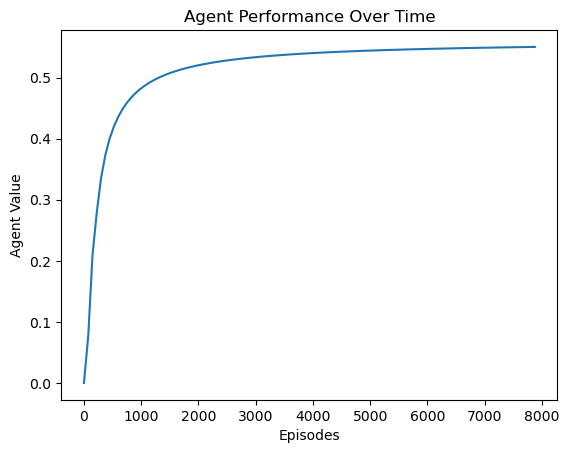

In [32]:
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Agent Performance Over Time')
plt.show()

In [33]:
sum = []
all_runs_data_counter = [] 
for i in range(10):
    tabularlearningcounter = DynamicQLearningCounterFactual(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm)
    tabular_data_counter = tabularlearningcounter.train( num_episodes = num_episodes, max_episode_length = episode_length )
    all_runs_data_counter.append(tabular_data_counter)
average_results_counter = [0] * len(all_runs_data_counter[0])
for i in range(len(all_runs_data_counter[0])):
    sum_val = 0
    for j in range(len(all_runs_data_counter)):
        sum_val += all_runs_data_counter[j][i]
    average_results_counter[i] = sum_val / len(all_runs_data_counter)
    average_results_counter[i] /= Value
print(average_results_counter)

[0.0, 0.21911941409368207, 0.316084773935111, 0.40329931279495296, 0.4556280361108582, 0.49051385165479505, 0.5154322913290357, 0.5341211210847161, 0.5486568775613565, 0.5602854827426687, 0.5697997960728334, 0.5777283905146372, 0.5844372011961634, 0.5901876103517574, 0.5951712982866053, 0.5995320252295975, 0.6033797254734141, 0.6067999034679177, 0.6098600627261578, 0.6126142060585739, 0.6151060500259978, 0.617371362723656, 0.6194396917084743, 0.6213356599445579, 0.6230799507217547, 0.6246900652853211, 0.626180912103438, 0.627565269863118, 0.6288541546738546, 0.6300571138305422, 0.6311824627190562, 0.6322374773020383, 0.6332285516072635, 0.6341613274239465, 0.6350408017653901, 0.6358714164211983, 0.6366571329875031, 0.6374014960503183, 0.6381076866483737, 0.6387785677165261, 0.6394167228789153, 0.6400244897002383, 0.6406039882973136, 0.6411571460490673, 0.6416857190118542, 0.6421913105414765, 0.6426753875379233, 0.6431392946595182, 0.6435842667965582, 0.6440114400481168, 0.6444218614074

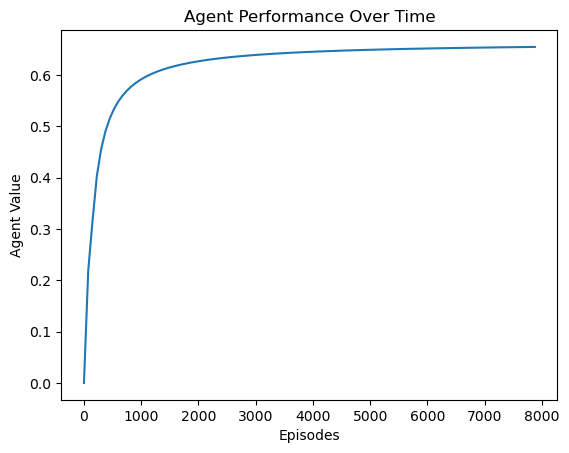

In [34]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Agent Performance Over Time')
plt.show()

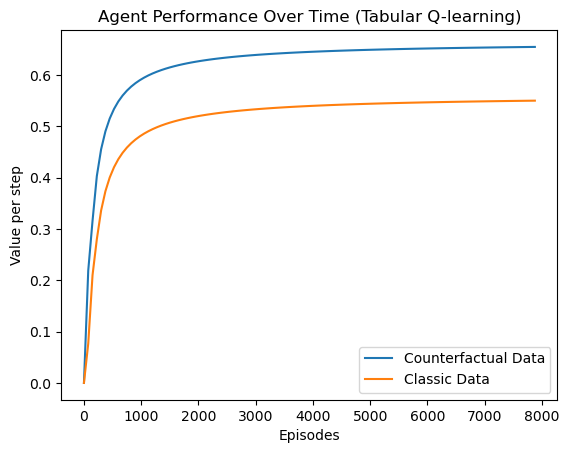

In [35]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter, label='Counterfactual Data')

# Plot classic data
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic, label='Classic Data')

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Value per step')
plt.title('Agent Performance Over Time (Tabular Q-learning)')

# Adding a legend to clarify which line corresponds to which dataset
plt.legend()

# Show the plot
plt.show()